## Project #1 - Python
### Dataset World-wide data on countries during COVID-19 pandemic
#### by Veronika Zemcikova

In [26]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

##### 1. Uploading the dataset

In [27]:
df = pd.read_csv('project_1_python.csv')
df.head(100)

,index,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,...,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population,median_age,gdp_per_capita,life_expectancy,latitude,longitude
0,0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
1,1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
2,2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
3,3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
4,4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,AFG,Asia,Afghanistan,2020-05-29,13745.0,643.0,250.0,11.0,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
96,96,AFG,Asia,Afghanistan,2020-05-30,14529.0,784.0,252.0,2.0,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
97,97,AFG,Asia,Afghanistan,2020-05-31,15180.0,651.0,254.0,2.0,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
98,98,AFG,Asia,Afghanistan,2020-06-01,15836.0,656.0,269.0,15.0,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0


##### 2. Exploring the data

In [28]:
df.dtypes

index                        int64
iso_code                    object
continent                   object
location                    object
date                        object
total_cases                float64
new_cases                  float64
total_deaths               float64
new_deaths                 float64
hosp_patients              float64
total_tests                float64
new_tests                  float64
tests_per_case             float64
total_vaccinations         float64
people_vaccinated          float64
people_fully_vaccinated    float64
total_boosters             float64
new_vaccinations           float64
population                 float64
median_age                 float64
gdp_per_capita             float64
life_expectancy            float64
latitude                   float64
longitude                  float64
dtype: object

In [29]:
df.dtypes

index                        int64
iso_code                    object
continent                   object
location                    object
date                        object
total_cases                float64
new_cases                  float64
total_deaths               float64
new_deaths                 float64
hosp_patients              float64
total_tests                float64
new_tests                  float64
tests_per_case             float64
total_vaccinations         float64
people_vaccinated          float64
people_fully_vaccinated    float64
total_boosters             float64
new_vaccinations           float64
population                 float64
median_age                 float64
gdp_per_capita             float64
life_expectancy            float64
latitude                   float64
longitude                  float64
dtype: object

##### 3. Transforming the data

In [30]:
df["date"] = pd.to_datetime(df["date"])
df.dtypes

index                               int64
iso_code                           object
continent                          object
location                           object
date                       datetime64[ns]
total_cases                       float64
new_cases                         float64
total_deaths                      float64
new_deaths                        float64
hosp_patients                     float64
total_tests                       float64
new_tests                         float64
tests_per_case                    float64
total_vaccinations                float64
people_vaccinated                 float64
people_fully_vaccinated           float64
total_boosters                    float64
new_vaccinations                  float64
population                        float64
median_age                        float64
gdp_per_capita                    float64
life_expectancy                   float64
latitude                          float64
longitude                         

In [31]:
df["date"].value_counts()

date
2021-08-29    225
2021-08-28    225
2021-08-27    225
2021-08-26    225
2021-08-25    225
             ... 
2020-01-11      3
2020-01-15      3
2020-01-03      2
2020-01-01      2
2020-01-02      2
Name: count, Length: 900, dtype: int64

In [32]:
"complete records: " + str(len(df.dropna(how="any"))) + "; total records: " + str(len(df))

'complete records: 7057; total records: 180477'

#### TOP 10 countries with the largest populations

In [33]:
df_unique = df.groupby('location', as_index=False)['population'].unique()
df_unique['population'] = df_unique['population'].str[0].astype(int)
#df_unique
top10 = df_unique.nlargest(10, 'population')
top10


,location,population
40,China,1444216102
90,India,1393409033
213,United States,332915074
91,Indonesia,276361788
151,Pakistan,225199929
26,Brazil,213993441
144,Nigeria,211400704
15,Bangladesh,166303494
165,Russia,145912022
126,Mexico,130262220


Text(0, 0.5, 'Population (B)')

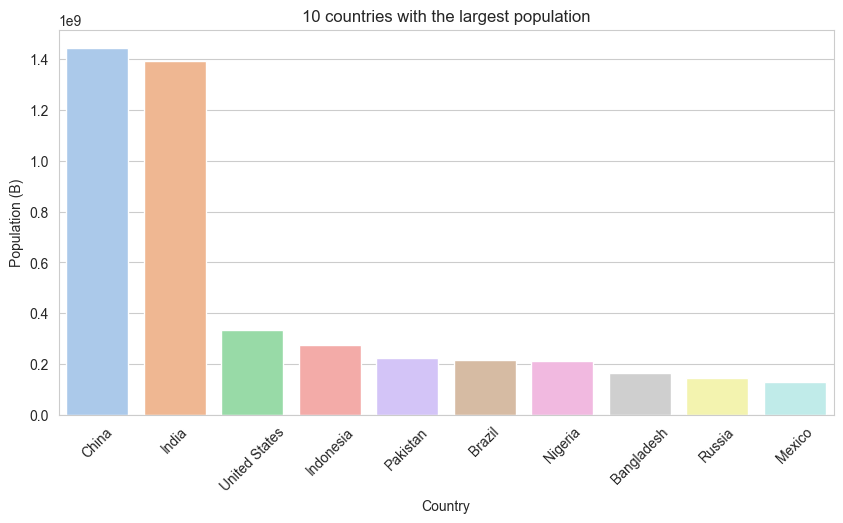

In [34]:
plt.figure(figsize=(10,5))

sns.set_style("whitegrid")

sns.barplot(data=top10,
             x='location',
             y='population',
             hue='location',
             palette='pastel')
plt.title('10 countries with the largest population')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.ylabel('Population (B)')

#### Relationship between population and life expectancy in a country

In [35]:
df_lfex = df.groupby('location', as_index=False).agg({
    'population': 'unique',
    'life_expectancy': 'unique',
    'continent' : 'unique'
})
#df_lfex
df_lfex['population'] = df_lfex['population'].str[0].astype(int)
df_lfex['life_expectancy'] = df_lfex['life_expectancy'].str[0].astype(float)
df_lfex['continent'] = df_lfex['continent'].str[0].astype(str)
df_lfex

,location,population,life_expectancy,continent
0,Afghanistan,39835428,64.83,Asia
1,Albania,2872934,78.57,Europe
2,Algeria,44616626,76.88,Africa
3,Andorra,77354,83.73,Europe
4,Angola,33933611,61.15,Africa
...,...,...,...,...
221,Wallis and Futuna,11094,79.94,Oceania
222,Western Sahara,611872,70.26,Africa
223,Yemen,30490639,66.12,Asia
224,Zambia,18920657,63.89,Africa


In [36]:
fig = px.scatter(data_frame=df_lfex,
        x='population',
        y='life_expectancy',
        hover_name='location',
        color='continent',
        size_max=30,
        log_x=True,
        title='Population vs. life expectancy',
        color_discrete_sequence=px.colors.qualitative.Plotly,
        labels={'continent': 'Continent'}
        )

fig.update_layout(
    xaxis_title='Population',
    yaxis_title='Life Expectancy (years)'
)

fig.show()

#### Number of diagnosed COVID-19 cases over time - Czechia vs. United States

In [37]:
df['location'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faeroe Islands', 'Falkland Islands', 'Fiji', 'Finland', 

In [38]:
df_new_cases = df[df["location"].isin(["Czechia", "United States"])]
df_new_cases


,index,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,...,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population,median_age,gdp_per_capita,life_expectancy,latitude,longitude
41385,43877,CZE,Europe,Czechia,2020-03-01,3.0,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10724553.0,43.3,32605.906,79.38,49.75,15.5
41386,43878,CZE,Europe,Czechia,2020-03-02,3.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10724553.0,43.3,32605.906,79.38,49.75,15.5
41387,43879,CZE,Europe,Czechia,2020-03-03,5.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10724553.0,43.3,32605.906,79.38,49.75,15.5
41388,43880,CZE,Europe,Czechia,2020-03-04,8.0,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10724553.0,43.3,32605.906,79.38,49.75,15.5
41389,43881,CZE,Europe,Czechia,2020-03-05,12.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10724553.0,43.3,32605.906,79.38,49.75,15.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171833,180264,USA,North America,United States,2022-06-14,85758512.0,92072.0,1011925.0,382.0,26065.0,...,259194972.0,221920648.0,120729086.0,137908.0,332915074.0,38.3,54225.446,78.86,38.00,-97.0
171834,180265,USA,North America,United States,2022-06-15,85941290.0,182778.0,1012607.0,682.0,26406.0,...,259198178.0,221924152.0,120741050.0,19381.0,332915074.0,38.3,54225.446,78.86,38.00,-97.0
171835,180266,USA,North America,United States,2022-06-16,86057735.0,116445.0,1012647.0,40.0,26093.0,...,NaN,NaN,NaN,NaN,332915074.0,38.3,54225.446,78.86,38.00,-97.0
171836,180267,USA,North America,United States,2022-06-17,86216418.0,158683.0,1013358.0,711.0,NaN,...,NaN,NaN,NaN,NaN,332915074.0,38.3,54225.446,78.86,38.00,-97.0


In [39]:
fig = px.line(df_new_cases, 
              x="date", 
              y="new_cases", 
              title= 'Number of diagnosed COVID-19 cases over time - Czechia vs. United States',
              color="location",
              color_discrete_sequence=["red", "orange"],
              labels={'date' : 'Date', 'new_cases' : 'Number of diagnosed cases', 'location' : 'Location'})
fig.show()


#### COVID-19 map

In [40]:
df_final = df.loc[df.groupby("location")["date"].idxmax()]
df_final

,index,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,...,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population,median_age,gdp_per_capita,life_expectancy,latitude,longitude
845,845,AFG,Asia,Afghanistan,2022-06-18,181574.0,40.0,7713.0,0.0,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
1690,1690,ALB,Europe,Albania,2022-06-18,277141.0,NaN,3497.0,0.0,NaN,...,NaN,NaN,NaN,NaN,2872934.0,38.0,11803.431,78.57,41.0,20.0
2535,2535,DZA,Africa,Algeria,2022-06-18,265971.0,3.0,6875.0,0.0,NaN,...,NaN,NaN,NaN,NaN,44616626.0,29.1,13913.839,76.88,28.0,3.0
3374,3374,AND,Europe,Andorra,2022-06-18,43449.0,NaN,153.0,0.0,NaN,...,NaN,NaN,NaN,NaN,77354.0,NaN,NaN,83.73,42.5,1.6
4195,4195,AGO,Africa,Angola,2022-06-18,99761.0,0.0,1900.0,0.0,NaN,...,NaN,NaN,NaN,NaN,33933611.0,16.8,5819.495,61.15,-12.5,18.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178031,188167,WLF,Oceania,Wallis and Futuna,2022-06-18,454.0,0.0,7.0,0.0,NaN,...,NaN,NaN,NaN,NaN,11094.0,NaN,NaN,79.94,-13.3,-176.2
178032,188168,ESH,Africa,Western Sahara,2022-04-20,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,611872.0,28.4,NaN,70.26,24.5,-13.0
178832,188968,YEM,Asia,Yemen,2022-06-18,11823.0,0.0,2149.0,0.0,NaN,...,NaN,NaN,NaN,NaN,30490639.0,20.3,1479.147,66.12,15.0,48.0
179655,189791,ZMB,Africa,Zambia,2022-06-18,324025.0,NaN,3992.0,0.0,NaN,...,NaN,NaN,NaN,NaN,18920657.0,17.7,3689.251,63.89,-15.0,30.0


In [41]:
df_final['ratio'] = (df_final['total_cases'] / df_final['population']).round(5)
df_final

,index,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,...,people_fully_vaccinated,total_boosters,new_vaccinations,population,median_age,gdp_per_capita,life_expectancy,latitude,longitude,ratio
845,845,AFG,Asia,Afghanistan,2022-06-18,181574.0,40.0,7713.0,0.0,NaN,...,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0,0.00456
1690,1690,ALB,Europe,Albania,2022-06-18,277141.0,NaN,3497.0,0.0,NaN,...,NaN,NaN,NaN,2872934.0,38.0,11803.431,78.57,41.0,20.0,0.09647
2535,2535,DZA,Africa,Algeria,2022-06-18,265971.0,3.0,6875.0,0.0,NaN,...,NaN,NaN,NaN,44616626.0,29.1,13913.839,76.88,28.0,3.0,0.00596
3374,3374,AND,Europe,Andorra,2022-06-18,43449.0,NaN,153.0,0.0,NaN,...,NaN,NaN,NaN,77354.0,NaN,NaN,83.73,42.5,1.6,0.56169
4195,4195,AGO,Africa,Angola,2022-06-18,99761.0,0.0,1900.0,0.0,NaN,...,NaN,NaN,NaN,33933611.0,16.8,5819.495,61.15,-12.5,18.5,0.00294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178031,188167,WLF,Oceania,Wallis and Futuna,2022-06-18,454.0,0.0,7.0,0.0,NaN,...,NaN,NaN,NaN,11094.0,NaN,NaN,79.94,-13.3,-176.2,0.04092
178032,188168,ESH,Africa,Western Sahara,2022-04-20,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,611872.0,28.4,NaN,70.26,24.5,-13.0,NaN
178832,188968,YEM,Asia,Yemen,2022-06-18,11823.0,0.0,2149.0,0.0,NaN,...,NaN,NaN,NaN,30490639.0,20.3,1479.147,66.12,15.0,48.0,0.00039
179655,189791,ZMB,Africa,Zambia,2022-06-18,324025.0,NaN,3992.0,0.0,NaN,...,NaN,NaN,NaN,18920657.0,17.7,3689.251,63.89,-15.0,30.0,0.01713


In [42]:
df_final = df_final.dropna(subset=['ratio'])
df_final['ratio'] = df_final['ratio'].fillna(0)

C:\Users\Mark\AppData\Local\Temp\ipykernel_36240\2612971903.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##### Variant A)

In [43]:
fig = px.choropleth(df_final,
                    locations="location",
                    locationmode="country names",
                    color="total_cases",
                    color_continuous_scale="RdYlGn_r",
                    title="Number of disease cases reported by countries",
                    width=1200,
                    height=700,
                    labels={'total_cases' : 'Disease cases (M)',
                            'location' : 'Location'
                            },
                    template="ggplot2") # instead of requested dark mode for better readability

fig.show()

##### Variant B)

In [44]:
fig = px.scatter_geo(df_final,
                     locations="location",
                     locationmode="country names",
                     color="continent",
                     size="ratio",
                     size_max=30,
                     hover_name="location",
                     hover_data={
                         "total_cases": True,
                         "ratio": True,
                         "continent": True
                     },
                     color_discrete_map={
                         'Africa': 'green',
                         'Asia': 'blue',
                         'Europe': 'red',
                         'North America': 'orange',
                         'Oceania': 'purple',
                         'South America': 'yellow'
                     },
                     title="Disease cases by continent and population ratio",
                     width=1200,
                     height=700,
                     labels={'total_cases': 'Disease cases (M)',
                             'ratio': 'Ratio of cases to population',
                             'continent' : 'Continent',
                             'location' : 'Location'
                             },
                     template="ggplot2") # instead of requested dark mode for better readability

fig.show()